<a href="https://colab.research.google.com/github/ZofiaLandowska/notes/blob/main/notebook6_landowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Zofia Landowska 

Date: 4/25/2023

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [1]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5416 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [2]:
# Build your CNN here

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=3,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

<ipython-input-4-8165053e702f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


Epoch 1/3
170/170 [==============================] - 454s 3s/step - loss: 0.3886 - accuracy: 0.8226 - val_loss: 0.8557 - val_accuracy: 0.6458
Epoch 2/3
170/170 [==============================] - 17s 100ms/step - loss: 0.1902 - accuracy: 0.9249 - val_loss: 1.1453 - val_accuracy: 0.6635
Epoch 3/3
170/170 [==============================] - 17s 99ms/step - loss: 0.1692 - accuracy: 0.9341 - val_loss: 1.0065 - val_accuracy: 0.7083


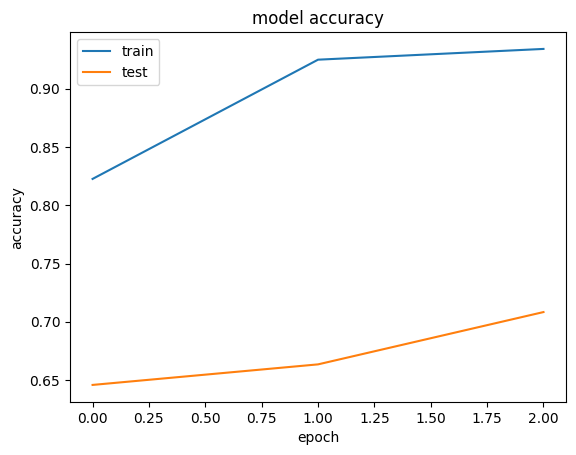

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()